1. Implementing K-means Clustering.

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the dataset (assuming the dataset is in a CSV file)
df = pd.read_csv('data\credit_card_data.csv')

# Drop the CUST_ID column as it is just an identifier
df = df.drop(columns=['CUST_ID'])

# Display first few rows of the dataset
print(df.head())

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

In [9]:
# Handle missing values by filling them with the mean of the respective columns
missing_Data=df.fillna(df.mean(), inplace=True)

# Display first few rows of the dataset
print(missing_Data)


None


In [10]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


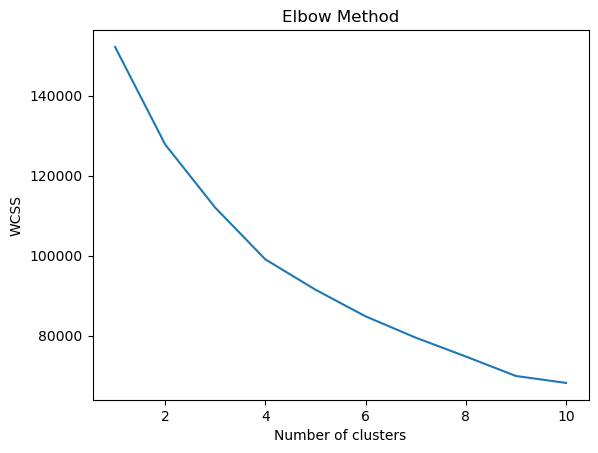

In [11]:
# Use the elbow method to determine the optimal number of clusters
wcss = []  # within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
# Apply KMeans with the optimal number of clusters (for example, 4)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Display the dataset with the cluster labels
print(df.head())
print(


       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

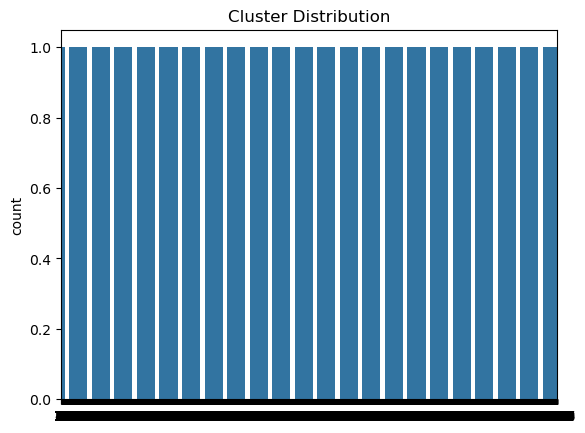

In [14]:
# Visualize the clusters using seaborn
sns.countplot(df['Cluster'])
plt.title('Cluster Distribution')
plt.show()


In [15]:
# Analyze the cluster centroids
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=df.columns[:-1])
print(cluster_centers)

    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.321688           0.242574   0.109044          0.000926   
1  1.459578           0.384753  -0.234638         -0.163914   
2 -0.265552          -0.368944  -0.343190         -0.230500   
3  0.954485           0.462694   3.125845          2.713251   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                0.255904     -0.366373             0.983721   
1               -0.253747      1.688972            -0.504848   
2               -0.387798     -0.182691            -0.797823   
3                2.406470     -0.155091             1.136338   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.317153                          0.874138   
1                   -0.212939                         -0.450201   
2                   -0.389437                         -0.714246   
3                    1.798653                          1.065918   

   CASH_ADVANCE_FREQUENCY  